<a href="https://colab.research.google.com/github/Amitha-sridhar/capstone_hotel_booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Loading the data**

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px

In [528]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [529]:
df=pd.read_csv('/content/drive/MyDrive/data/Hotel Bookings.csv')

# **Understanding the data**

In [530]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [531]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [532]:
df.shape

(119390, 32)

In [533]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [534]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [535]:
df.size

3820480

In [536]:
df.shape

(119390, 32)

In [537]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Cleaning the Data**

> by dropping values which didnt seem relevant for our study.

*  arrival_date_week_number,company and agent

In [538]:
df['kids']=df['babies'] + df['children']

In [539]:
df.drop(['arrival_date_week_number','company','agent','babies','children'], axis=1, inplace=True)

In [540]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000
mean,0.370416,104.011416,2016.156554,15.798241,0.927599,2.500302,1.856403,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,0.111839
std,0.482918,106.863097,0.707476,8.780829,0.998613,1.908286,0.579261,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,0.412567
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


# Cancellation Concepts based on following details


> Getting the total number of guests in one column.



In [541]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_

# To further clean the data if the numerical value in a column is null and if the count of the null is nominal we can upload it to the medina value.
Here the null ount of children is just 4 out of 1lakh plus records. hence the method

In [542]:
df['kids'].median()

0.0

In [543]:
df['kids'].fillna(df['kids'].median(), inplace=True)

# Further clean up of string data. If a nominal count of string data is null then fill it by using the mode.Here the Null values of country is less than .5% so we can add the mode to null values

In [544]:
df['country'].mode()

0    PRT
dtype: object

In [545]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [546]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [547]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
kids                        


**DATA IS NOW CLEAN!!!!!**


> **Now Handling Outliers**



In [548]:
#Sanjay was working on this#

There are 2 undefined values so will be filled by the mode value

In [549]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [550]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [551]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [552]:
#do we fill it with 0 or the mode?????

# **Bookings based on the hotel type**

In [553]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [554]:
df['reservation_status_date'].count()

119390

In [555]:
hotel_date=df.groupby('hotel')['reservation_status_date'].value_counts()
hotel_date

hotel         reservation_status_date
City Hotel    2015-10-21                 1416
              2015-07-06                  763
              2015-01-01                  760
              2016-11-25                  746
              2016-01-18                  553
                                         ... 
Resort Hotel  2015-05-15                    1
              2015-05-30                    1
              2015-06-14                    1
              2015-06-20                    1
              2017-09-12                    1
Name: reservation_status_date, Length: 1777, dtype: int64

# **Histogram to show the distribution of data throughout the values**

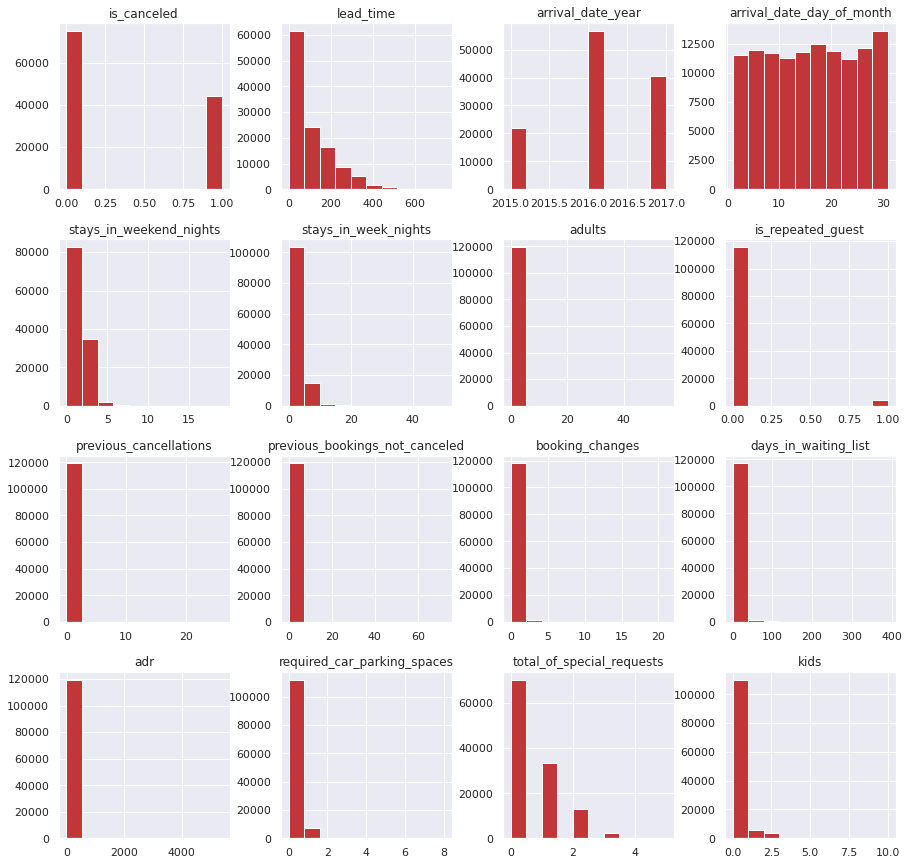

In [556]:
df.hist(figsize=(15,15))
plt.show()

## **Reservations in different Hotel Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



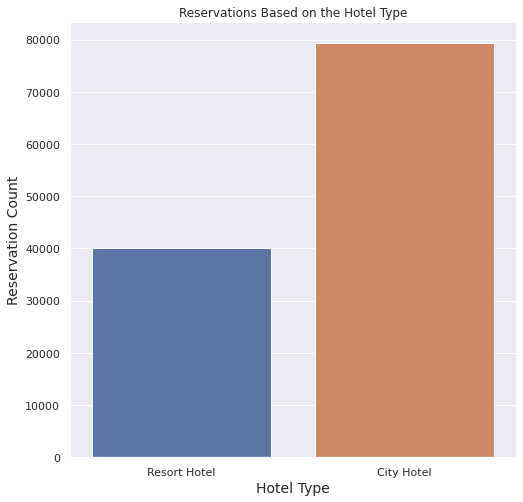

In [557]:
# This graph shows the reservations made in both type of hotels- 'Resort Hotel','City Hotel'.
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot('hotel', data = df)
graph.set(title='Reservations Based on the Hotel Type')
graph.set_xlabel('Hotel Type', fontsize = 14)
graph.set_ylabel('Reservation Count', fontsize = 14)
plt.show()

Text(0, 0.5, 'Reservation Count')

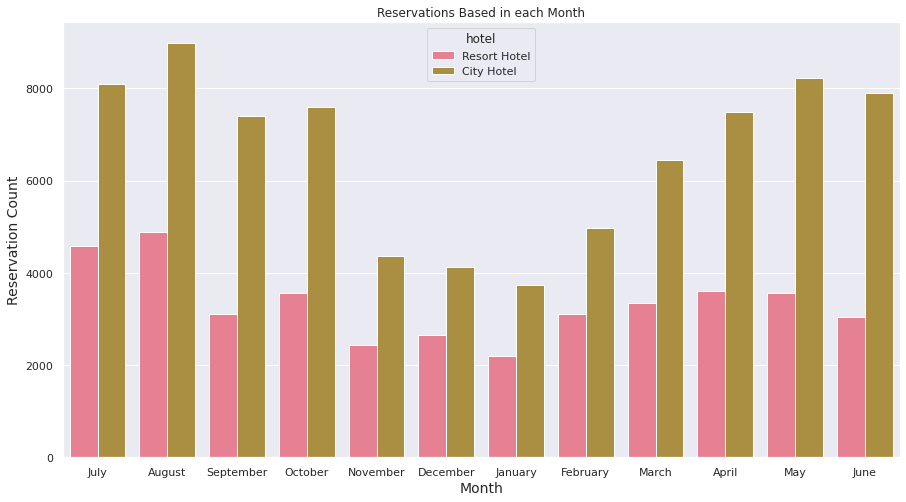

In [558]:
# This graph shows the reservations made in each month for different hotel types.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("husl")
graph = sns.countplot(x = 'arrival_date_month',hue='hotel', data=df)
graph.set(title='Reservations Based in each Month')
graph.set_xlabel('Month',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)

## **Cancellations in different Hotel Type**

Text(0, 0.5, 'Cancellation')

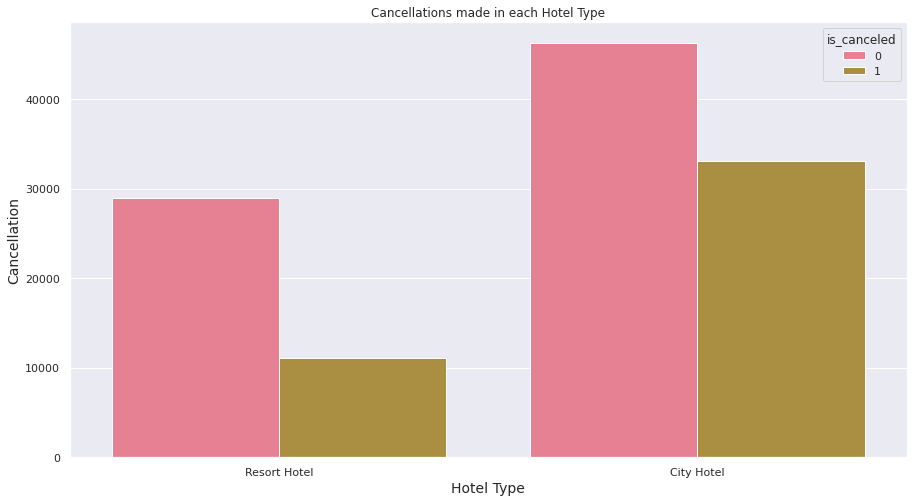

In [559]:
# This graph shows cancellations made in different hotel types.
graph = sns.countplot(x = df['hotel'],hue=df['is_canceled'])
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Spectral")
graph.set(title='Cancellations made in each Hotel Type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

In [560]:
df[['adults','is_canceled']].value_counts()

adults  is_canceled
2       0              54422
        1              35258
1       0              16353
        1               6674
3       0               4051
        1               2151
0       0                294
        1                109
4       0                 46
        1                 16
26      1                  5
5       1                  2
20      1                  2
27      1                  2
6       1                  1
10      1                  1
40      1                  1
50      1                  1
55      1                  1
dtype: int64

In [561]:
df['kids_count'] = df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')
df['kids_count']

0         no_kids
1         no_kids
2         no_kids
3         no_kids
4         no_kids
           ...   
119385    no_kids
119386    no_kids
119387    no_kids
119388    no_kids
119389    no_kids
Name: kids_count, Length: 119390, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cancellation')

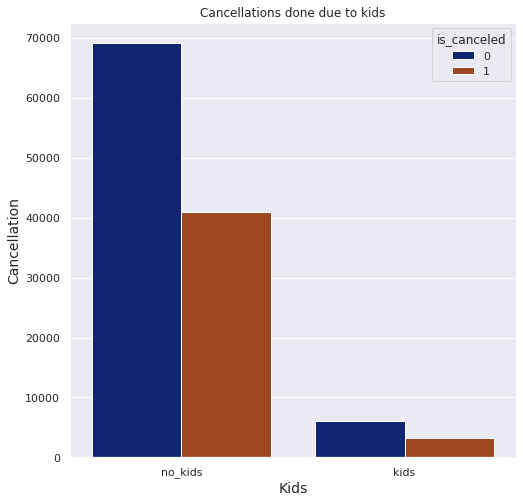

In [562]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("dark")
graph = sns.countplot(df['kids_count'],hue=df['is_canceled'])
graph.set(title='Cancellations done due to kids')
graph.set_xlabel('Kids',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cancellation')

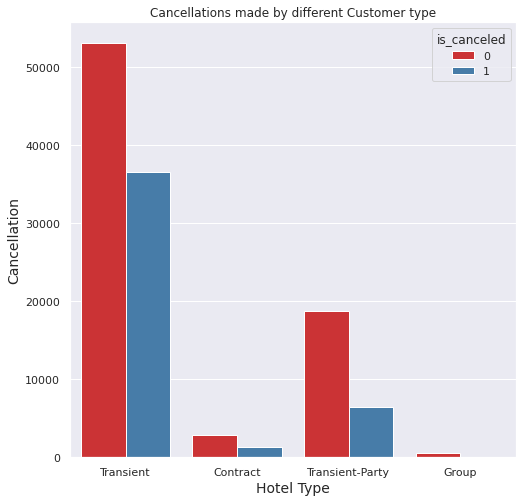

In [563]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
graph = sns.countplot(df['customer_type'],hue=df['is_canceled'])
graph.set(title='Cancellations made by different Customer type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

Text(0, 0.5, 'Cancellation')

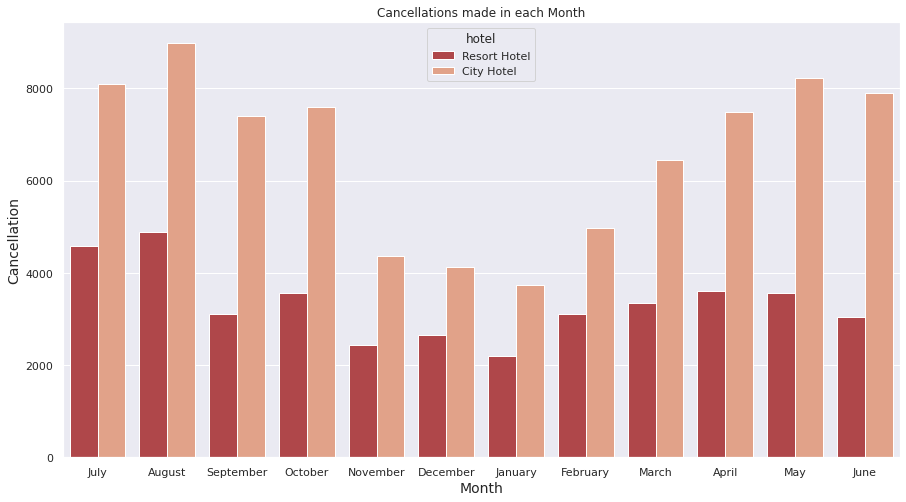

In [564]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("RdGy")
graph = sns.countplot(x = 'arrival_date_month',hue='hotel', data=df)
graph.set(title='Cancellations made in each Month')
graph.set_xlabel('Month',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

Text(0, 0.5, 'Cancellation')

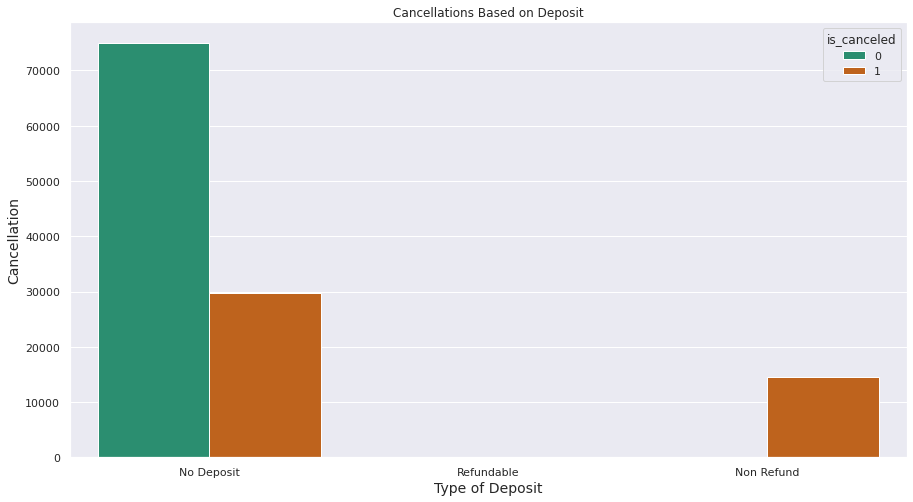

In [565]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
graph = sns.countplot(x = 'deposit_type',hue='is_canceled', data=df)
graph.set(title='Cancellations Based on Deposit')
graph.set_xlabel('Type of Deposit',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cancellation')

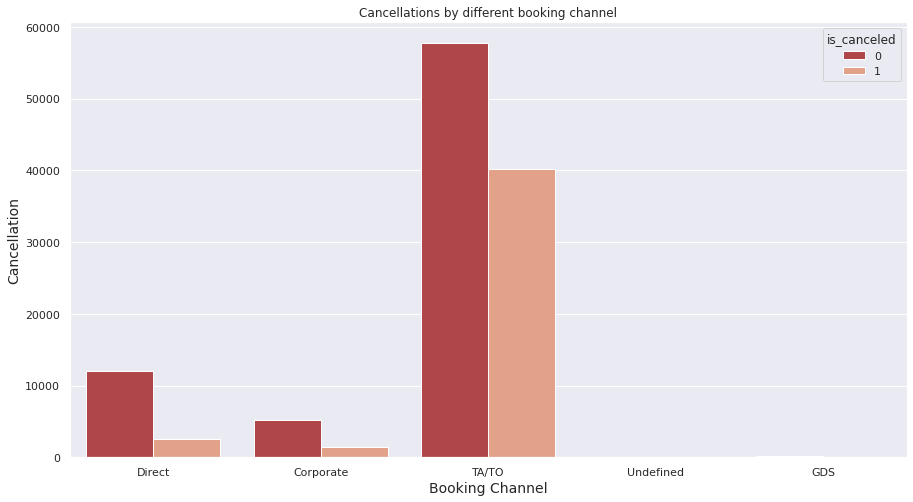

In [566]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("RdGy")
graph = sns.countplot(df["distribution_channel"], hue=df["is_canceled"], data=df)
graph.set(title='Cancellations by different booking channel')
graph.set_xlabel('Booking Channel',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

In [567]:
country_df=pd.DataFrame(df.loc[df['is_canceled']==0]['country'].value_counts())
country_df

,country
PRT,21492
GBR,9676
FRA,8481
ESP,6391
DEU,6069
...,...
BHR,1
DJI,1
MLI,1
NPL,1


In [568]:
country_df=pd.DataFrame(df.loc[df['is_canceled']==0]['country'].value_counts())
country_df
country_df.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df['%_no_of_guests']=round(country_df['Number of Guests']/total_guests*100,2)
country_df['country']=country_df.index

In [569]:
fig=px.pie(country_df,
           values='Number of Guests',
           names='country',
           title="Home country of guests",
           template="seaborn"
           )
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [570]:
df[['adults','is_canceled']].value_counts()

adults  is_canceled
2       0              54422
        1              35258
1       0              16353
        1               6674
3       0               4051
        1               2151
0       0                294
        1                109
4       0                 46
        1                 16
26      1                  5
5       1                  2
20      1                  2
27      1                  2
6       1                  1
10      1                  1
40      1                  1
50      1                  1
55      1                  1
dtype: int64

In [571]:
df['kids_count'] = df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')
df['kids_count']

0         no_kids
1         no_kids
2         no_kids
3         no_kids
4         no_kids
           ...   
119385    no_kids
119386    no_kids
119387    no_kids
119388    no_kids
119389    no_kids
Name: kids_count, Length: 119390, dtype: object

##**Analysis based on Hotel**

In [572]:
hotel_month = df.groupby('hotel')['arrival_date_month']
hotel_month = hotel_month.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Bookings')

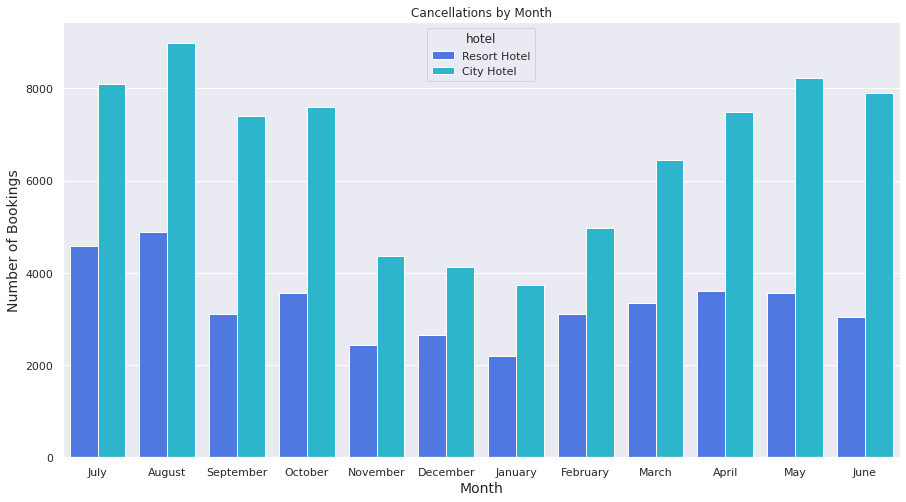

In [573]:
# This graph shows hotel availability in each month.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("rainbow")
graph = sns.countplot(df["arrival_date_month"], hue=df["hotel"], data=df)
graph.set(title='Cancellations by Month')
graph.set_xlabel('Month',fontsize = 14)
graph.set_ylabel('Number of Bookings',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Bookings')

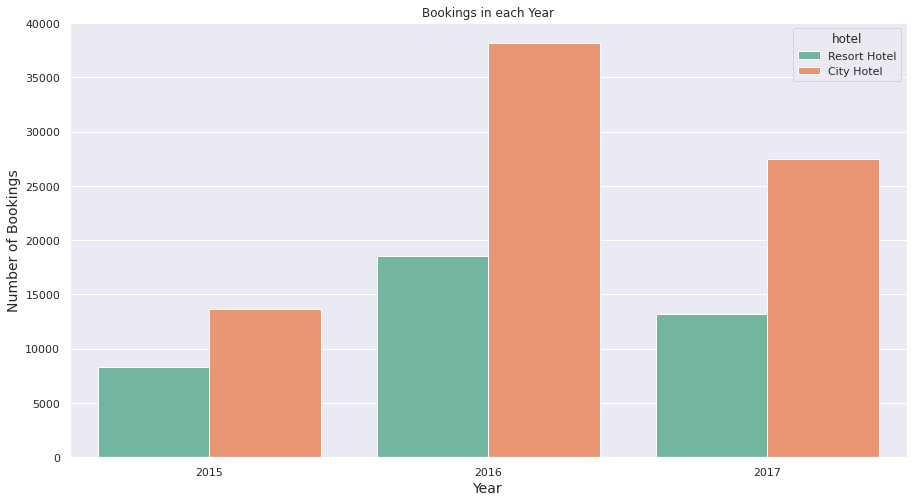

In [574]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set2")
graph = sns.countplot(df["arrival_date_year"], hue=df["hotel"], data=df)
graph.set(title='Bookings in each Year')
graph.set_xlabel('Year',fontsize = 14)
graph.set_ylabel('Number of Bookings',fontsize = 14)

In [575]:
#groupby
bookings_by_months_df=df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sorting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,92.643116
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.638560


Text(0, 0.5, 'ADR')

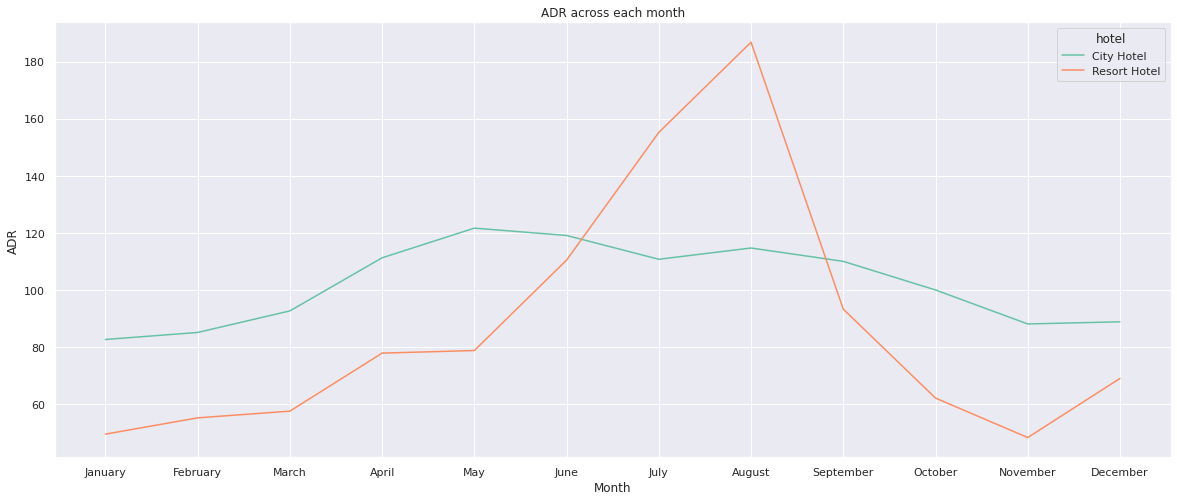

In [576]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

In [577]:
df['booking_status'] = df['reserved_room_type']!=df['assigned_room_type']
df['booking_status'] = df.booking_status.map( lambda x: 'changed' if x == False else 'Not changed')
df['booking_status']

0             changed
1             changed
2         Not changed
3             changed
4             changed
             ...     
119385        changed
119386        changed
119387        changed
119388        changed
119389        changed
Name: booking_status, Length: 119390, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



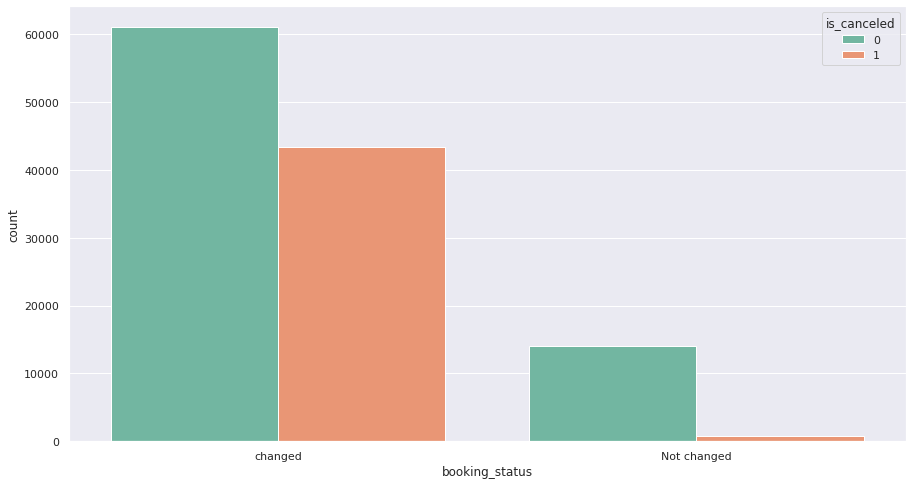

In [578]:
sns.countplot(df['booking_status'],hue=df['is_canceled'])

In [579]:
df['kids_count'] = df.kids.map( lambda x: 'Adults' if x == 0 else 'Kids')
df['kids_count']

0         Adults
1         Adults
2         Adults
3         Adults
4         Adults
           ...  
119385    Adults
119386    Adults
119387    Adults
119388    Adults
119389    Adults
Name: kids_count, Length: 119390, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

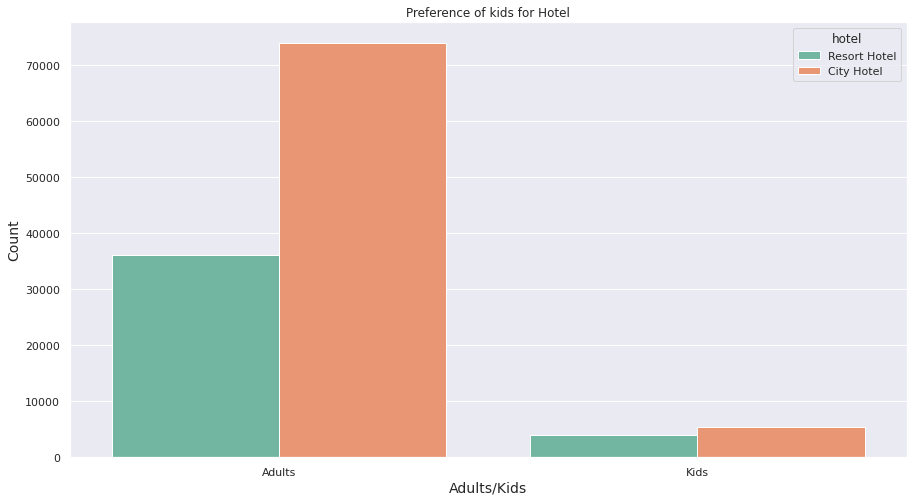

In [580]:
# This graph shows customer preference for hotel types
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set2")
graph = sns.countplot(df["kids_count"], hue=df["hotel"], data=df)
graph.set(title='Preference of kids for Hotel')
graph.set_xlabel('Adults/Kids',fontsize = 14)
graph.set_ylabel('Count',fontsize = 14)

In [581]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'kids_count',
       'booking_status'],
      dtype='object')

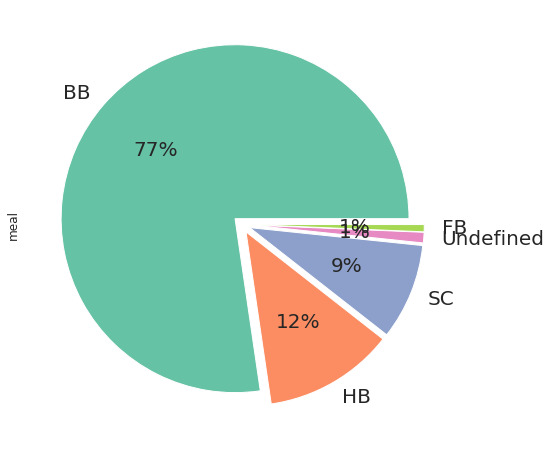

In [582]:
df['meal'].value_counts().plot.pie(explode=[0.05]*5, autopct='%.0f%%', figsize=(10,8),fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

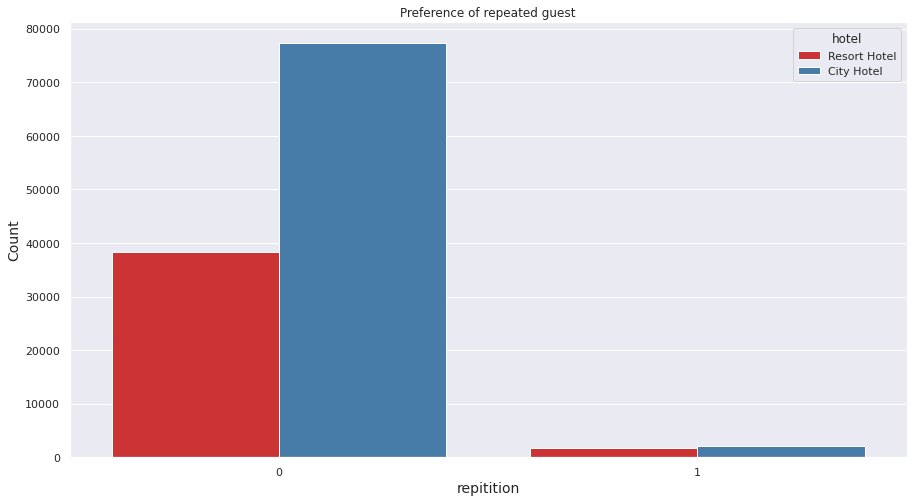

In [583]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set1")
graph = sns.countplot(df["is_repeated_guest"], hue=df["hotel"], data=df)
graph.set(title='Preference of repeated guest')
graph.set_xlabel('repitition',fontsize = 14)
graph.set_ylabel('Count',fontsize = 14)

### **ADR Studies**

Text(0, 0.5, 'ADR')

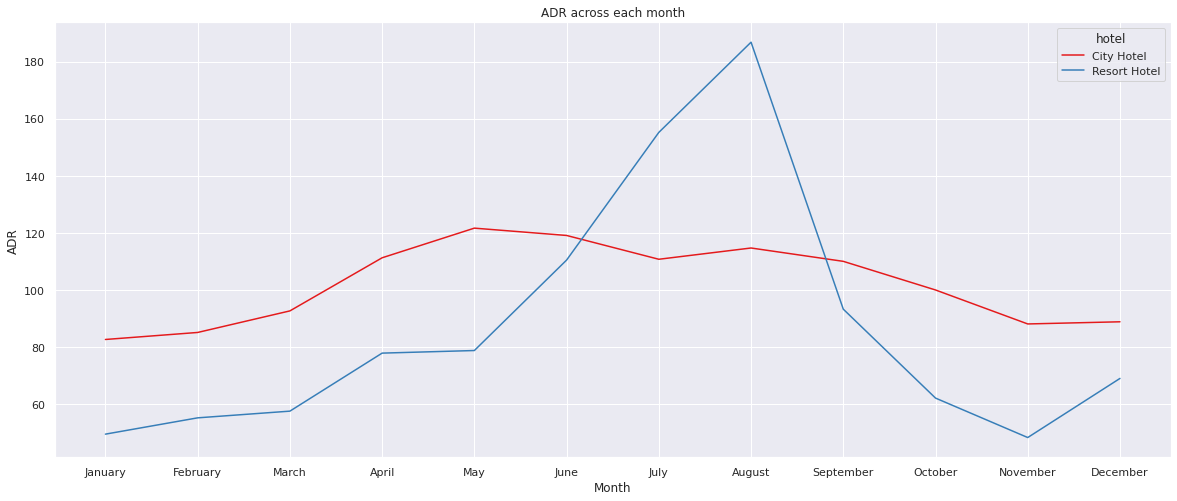

In [584]:
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])
sns.set_palette("Set2")
# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

Text(0.5, 1.0, 'ADR on each year')

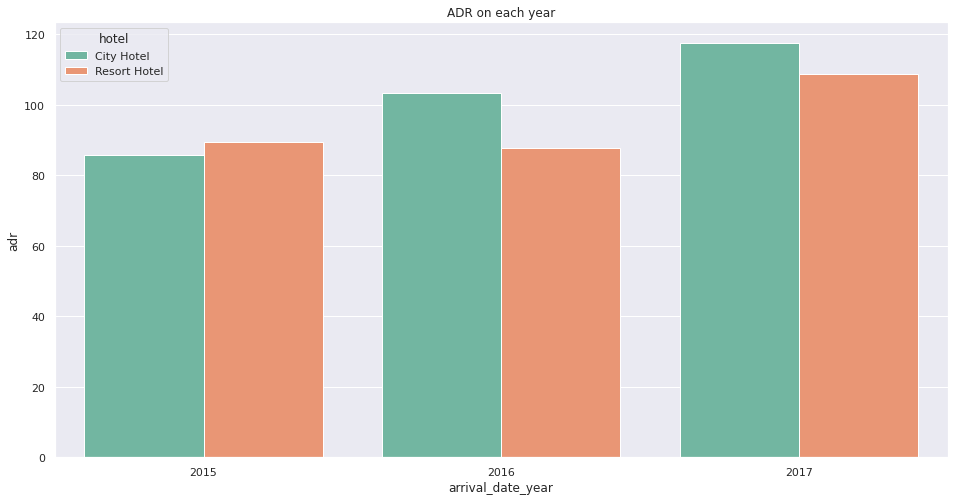

In [585]:
df_year=df.groupby(['arrival_date_year','hotel'])['adr'].mean().reset_index()
# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='arrival_date_year', y='adr', data=df_year, hue='hotel')
plt.title('ADR on each year')

Text(0.5, 1.0, 'ADR based on meal type')

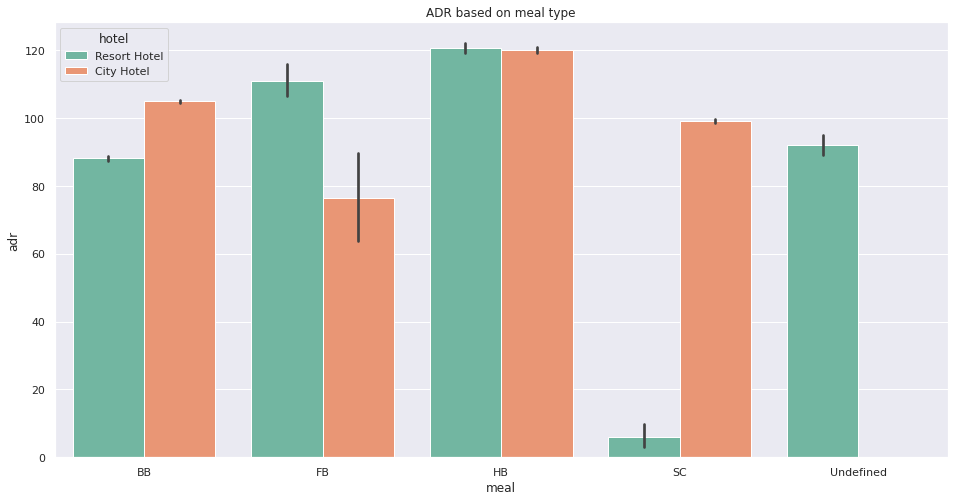

In [586]:
# group by distribution channel and hotel
# df_meal=df.groupby(['meal','hotel'])['adr']

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='meal', y='adr', data=df, hue='hotel')
plt.title('ADR based on meal type')

In [587]:
# Finding Top 10 countries with highest adr mean.
country_adr = df.groupby('country')['adr'].mean().astype(int).reset_index().sort_values(by='adr',ascending=False).head(10)
country_adr

,country,adr
44,DJI,273
2,AIA,265
4,AND,202
167,UMI,200
93,LAO,181
118,MYT,177
120,NCL,175
60,GEO,169
36,COM,165
57,FRO,155


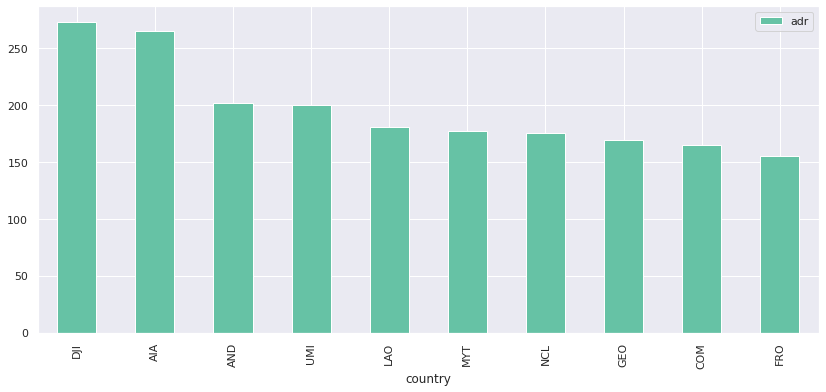

In [588]:
# Plotting graph for Top 10 countries with highest adr mean.
country_adr.plot(x='country', y='adr', kind='bar',figsize = (14, 6))

Text(0, 0.5, 'ADR')

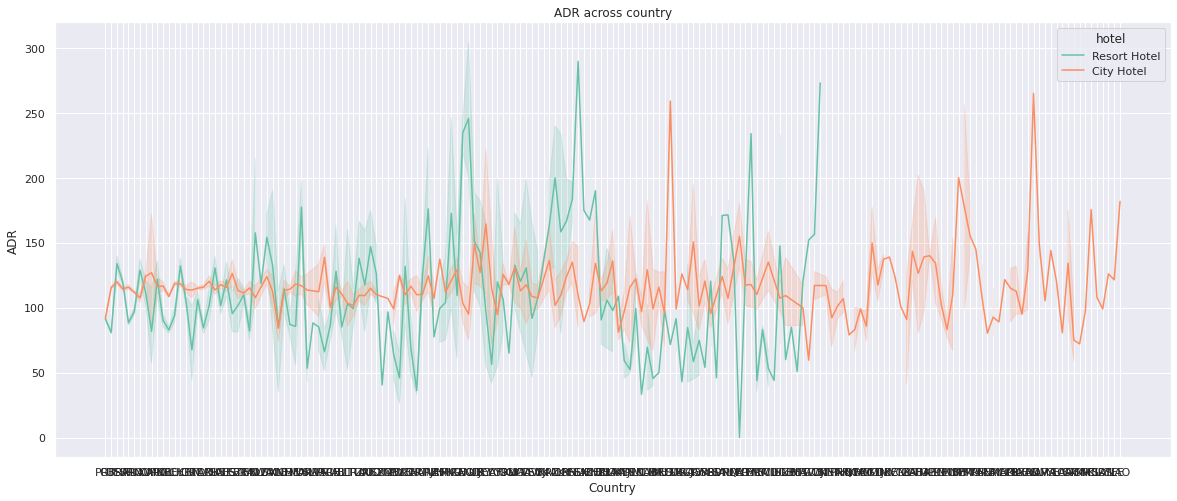

In [589]:
## if you are deleting or editing plz make a note so that you can explain me later
plt.figure(figsize=(20,8))#is my logic wrong or do we need to clean adr data????
sns.lineplot(x=df['country'],y=df['adr'],hue=df['hotel'])#Country name label
sns.set_palette("Set1")
# set lables
plt.title('ADR across country')
plt.xlabel('Country')
plt.ylabel('ADR')

Text(0, 0.5, 'ADR')

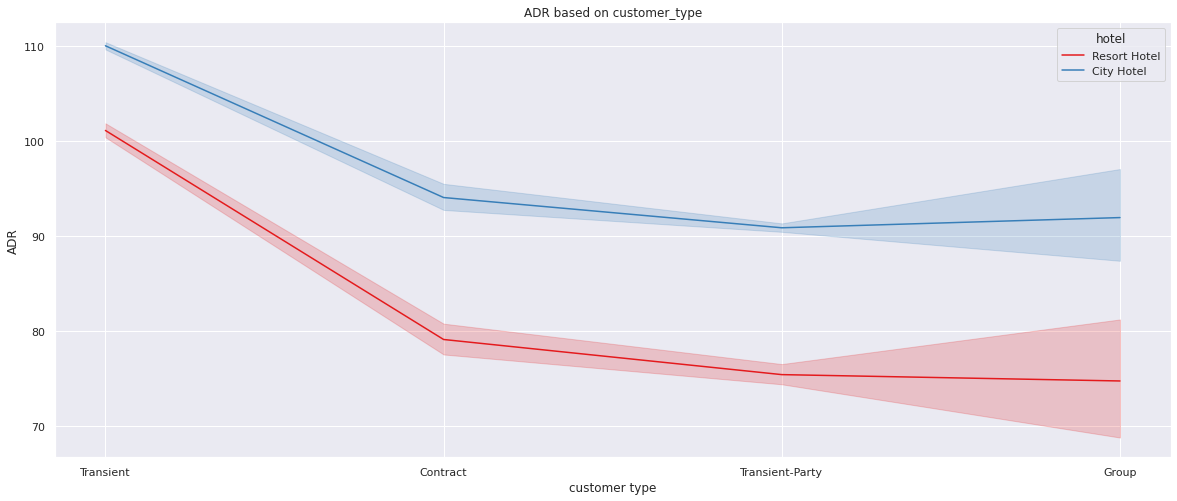

In [590]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['customer_type'],y=df['adr'],hue=df['hotel'])#do we need to take the mean of ADR?
sns.set_palette("Set1")
# set lables
plt.title('ADR based on customer_type')
plt.xlabel('customer type')
plt.ylabel('ADR')

Text(0.5, 1.0, 'Adr based on Customer type')

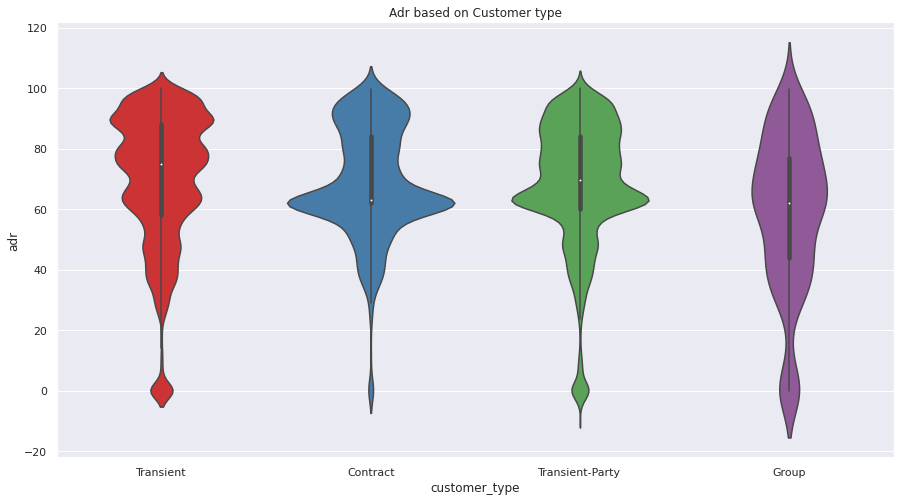

In [591]:
customer_adr=df[df.adr < 100]
viz_2=sns.violinplot(data=customer_adr, x='customer_type', y='adr')
viz_2.set_title('Adr based on Customer type')

Text(0.5, 0, 'Property Type')

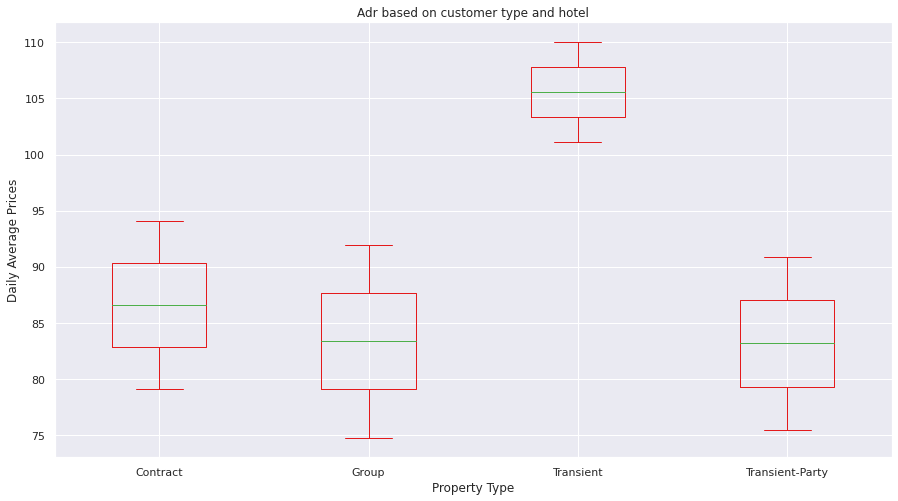

In [592]:
df.groupby(['hotel','customer_type'])['adr'].mean().unstack().plot(kind="box")
plt.title('Adr based on customer type and hotel')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

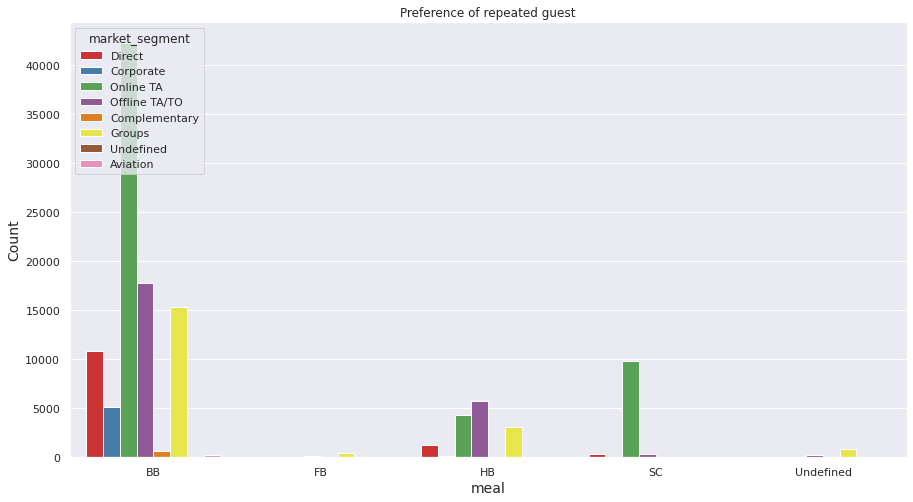

In [593]:
# This graph shows meal preference for different market segment.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set1")
graph = sns.countplot(df["meal"], hue=df["market_segment"], data=df)
graph.set(title='Preference of repeated guest')
graph.set_xlabel('meal',fontsize = 14)
graph.set_ylabel('Count',fontsize = 14)

Text(0.5, 1.0, 'ADR across Distribution channel')

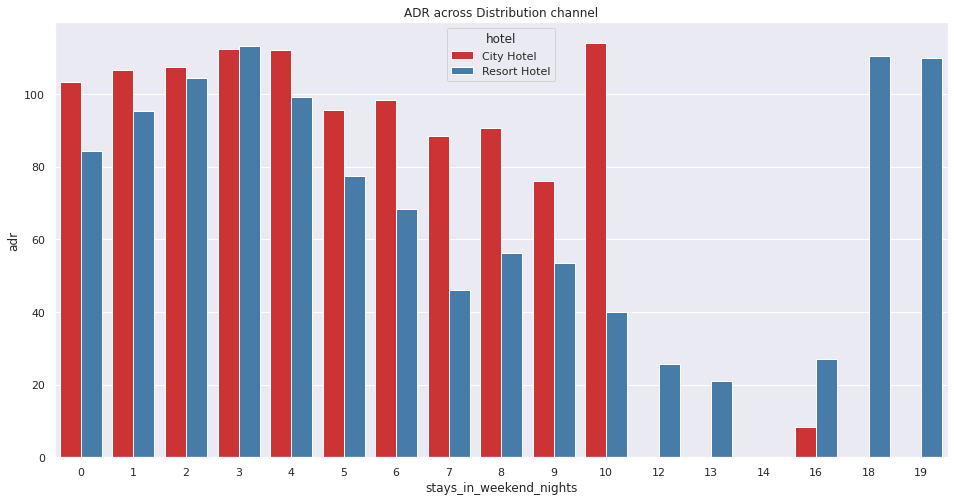

In [594]:
df_weekend=df.groupby(['stays_in_weekend_nights','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='stays_in_weekend_nights', y='adr', data=df_weekend, hue='hotel')
plt.title('ADR across Distribution channel')

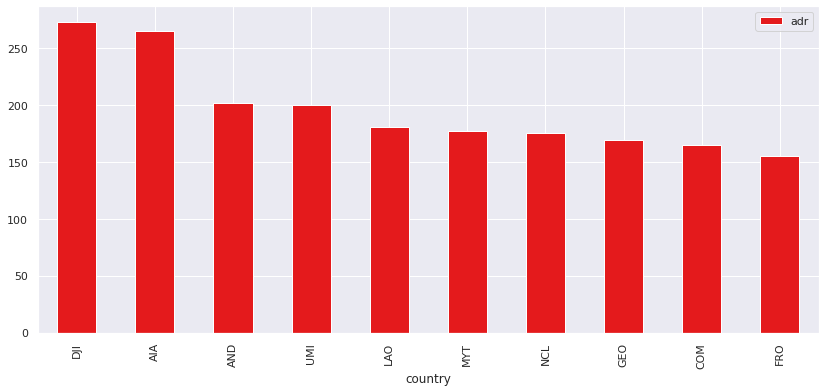

In [595]:
country_adr.plot(x='country', y='adr', kind='bar',figsize = (14, 6))

In [596]:
import plotly.express as px
fig = px.choropleth(df, locations="country",
                    color="adr",
                    hover_name="arrival_date_year",
                    animation_frame="distribution_channel",
                    title = "Fare of hotels in Different Country",
                    color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()

In [597]:
df['guest']=df['adults']+df['kids']
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'kids_count',
       'booking_status', 'guest'],
      dtype='object')